# Jaccard index computation between shape files
## Development version

This notebook illustrates the calculation of the Jaccard index between slums shape file and slighntly modified one denoting the municipality ground truth for the slums in Kalyan, India.

Python package imports

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import fiona
#import shapely.geometry as shgeom
from fiona import collection as ficol
from descartes import PolygonPatch

Paths and filenames

In [2]:
# data paths
TRUTH_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/original/"
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality.shp"
test_shape_fname1 = "slums_municipality_modified1.shp" # does not display!?
test_shape_fname2 = "slums_municipality_modified2.shp" # for now copy os the truth shape file

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TRUTH_SHAPE_PATH, slums_shape_fname)
test_slums_shape_fullfname1 = os.path.join(TEST_SHAPE_PATH, test_shape_fname1)
test_slums_shape_fullfname2 = os.path.join(TEST_SHAPE_PATH, test_shape_fname2)

print("Full truth shape filename: ", truth_slums_shape_fullfname)
print("Full test shape filename1: ", test_slums_shape_fullfname1)
print("Full test shape filename2: ", test_slums_shape_fullfname2)

Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/original/slums_municipality.shp
Full test shape filename1:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified1.shp
Full test shape filename2:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified2.shp


Load data and display the bounds

In [3]:
fp = fiona.open(truth_slums_shape_fullfname)
xmin, ymin, xmax, ymax = fp.bounds
print(fp.bounds)
print("xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)
offset= 100
fp.close()

(297328.6765506615, 2123671.144477916, 300732.35364115785, 2127839.1117448886)
xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886


Load data and display in figure

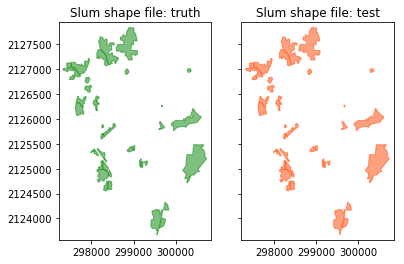

In [4]:
ORANGE = '#FF4500'
GREEN = '#008000'
fig = plt.figure(1, figsize=(50, 50), dpi=120)
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

with ficol(truth_slums_shape_fullfname, "r") as input:
    for f in input:
        ax1.add_patch(
            PolygonPatch(
                f['geometry'], fc=GREEN, ec=GREEN, alpha=0.5 ))
ax1.set_xlim(xmin - offset, xmax + offset) 
ax1.set_ylim(ymin - offset, ymax + offset)              
ax1.set_title('Slum shape file: truth')

with ficol(test_slums_shape_fullfname2, "r") as input:
    for g in input:
        ax2.add_patch(
            PolygonPatch(
                g['geometry'], fc=ORANGE, ec=ORANGE, alpha=0.5 ))            

ax2.set_xlim(xmin - offset, xmax + offset) 
ax2.set_ylim(ymin - offset, ymax + offset) 

ax2.set_title('Slum shape file: test')
plt.show()
